# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/SouthDakota/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/SouthDakota/Overlays


## Overlay Area Data #1 - South_Dakota_Water_Development_Districts

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/South_Dakota_Water_Development_Districts.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/South_Dakota_Water_Development_Districts.zip', compression=dict(method='zip', archive_name='South_Dakota_Water_Development_Districts.csv'), index=False)

print(len(dfin1))
dfin1.head()

49


,OBJECTID,District,WDDistrict,geometry,WaDEUUID
0,1,D2,ED,"POLYGON ((-96.45221 45.15084, -96.45237 45.136...",ov0
1,2,D3,ED,"POLYGON ((-96.45254 44.2837, -96.45249 44.2797...",ov1
2,3,D4,ED,"MULTIPOLYGON (((-97.33249 44.02249, -97.3274 4...",ov2
3,4,D7,ED,"MULTIPOLYGON (((-96.70082 43.52283, -96.69849 ...",ov3
4,5,D8,ED,"POLYGON ((-96.6943 43.54757, -96.69394 43.5430...",ov4


In [4]:
# include name of each district

name = []
for x in dfin1["WDDistrict"]:
    if x == "ED":
        name.append("East Dakota")
    elif x == "JR":
        name.append("James River") 
    elif x == "WD":
        name.append("West Dakota")
    elif x == "WR":
        name.append("West River")
    elif x == "CP":
        name.append("Central Plains")
    elif x == "SC":
        name.append("South Central")
    else:
        name.append("Vermillion Basin")
    
dfin1["name"] = name

In [5]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "8/7/2023"
df['in_Year'] = "2023"

# Organization Info
df['in_OrganizationUUID'] = "SDov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["name"]
df['in_ReportingUnitNativeID'] = "SD" + dfin1["OBJECTID"].replace("", 0).fillna(0).astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Water Development District"
df['in_ReportingUnitUpdateDate'] = "3/21/2021"
df['in_StateCV'] = "SD"
df['in_Geometry'] = dfin1['geometry']

# Overlay Info
df['in_OversightAgency'] = "South Dakota Association of Rural Water Systems"
df['in_OverlayDescription'] = "work to promote the conservation, development and proper management of water resources"
df['in_OverlayName'] = dfin1["name"]
df['in_OverlayNativeID'] = dfin1["OBJECTID"]
df['in_OverlayStatusCV'] = "Active"
df['in_Statute'] = ""
df['in_StatuteLink'] =""
df['in_StatutoryEffectiveDate'] = "1/1/2011"
df['in_StatutoryEndDate'] = ""
df['in_OverlayTypeCV'] = "Water Development District"
df['in_WaterSourceTypeCV'] = "Surface Water"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

49


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_OverlayDescription,in_OverlayName,in_OverlayNativeID,in_OverlayStatusCV,in_Statute,in_StatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_OverlayTypeCV,in_WaterSourceTypeCV
0,ov0,8/7/2023,2023,SDov_O1,4326,East Dakota,SD1,,Water Development District,3/21/2021,SD,"POLYGON ((-96.45221 45.15084, -96.45237 45.136...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,1,Active,,,1/1/2011,,Water Development District,Surface Water
1,ov1,8/7/2023,2023,SDov_O1,4326,East Dakota,SD2,,Water Development District,3/21/2021,SD,"POLYGON ((-96.45254 44.2837, -96.45249 44.2797...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,2,Active,,,1/1/2011,,Water Development District,Surface Water
2,ov2,8/7/2023,2023,SDov_O1,4326,East Dakota,SD3,,Water Development District,3/21/2021,SD,"MULTIPOLYGON (((-97.33249 44.02249, -97.3274 4...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,3,Active,,,1/1/2011,,Water Development District,Surface Water
3,ov3,8/7/2023,2023,SDov_O1,4326,East Dakota,SD4,,Water Development District,3/21/2021,SD,"MULTIPOLYGON (((-96.70082 43.52283, -96.69849 ...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,4,Active,,,1/1/2011,,Water Development District,Surface Water
4,ov4,8/7/2023,2023,SDov_O1,4326,East Dakota,SD5,,Water Development District,3/21/2021,SD,"POLYGON ((-96.6943 43.54757, -96.69394 43.5430...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,5,Active,,,1/1/2011,,Water Development District,Surface Water


## Overlay Area #2

In [6]:
# etc etc,

## Concatenate DataFrames together

In [7]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

49


## Clean Data / data types

In [8]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [9]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['East Dakota', 'James River', 'West Dakota', 'West River',
       'Central Plains', 'South Central', 'Vermillion Basin'],
      dtype=object)

In [10]:
outdf['in_OverlayDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_OverlayDescription']), axis=1)
outdf['in_OverlayDescription'].unique()

array(['work to promote the conservation, development and proper management of water resources'],
      dtype=object)

In [11]:
outdf['in_OverlayName'] = outdf.apply(lambda row: ensureEmptyString(row['in_OverlayName']), axis=1)
outdf['in_OverlayName'].unique()

array(['East Dakota', 'James River', 'West Dakota', 'West River',
       'Central Plains', 'South Central', 'Vermillion Basin'],
      dtype=object)

In [12]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['2011-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [13]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

49


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_OverlayDescription,in_OverlayName,in_OverlayNativeID,in_OverlayStatusCV,in_Statute,in_StatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_OverlayTypeCV,in_WaterSourceTypeCV,geometry
0,ov0,8/7/2023,2023,SDov_O1,4326,East Dakota,SD1,,Water Development District,3/21/2021,SD,"POLYGON ((-96.45221 45.15084, -96.45237 45.136...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,1,Active,,,2011-01-01,,Water Development District,Surface Water,"POLYGON ((-96.45221 45.15084, -96.45237 45.136..."
1,ov1,8/7/2023,2023,SDov_O1,4326,East Dakota,SD2,,Water Development District,3/21/2021,SD,"POLYGON ((-96.45254 44.2837, -96.45249 44.2797...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,2,Active,,,2011-01-01,,Water Development District,Surface Water,"POLYGON ((-96.45254 44.2837, -96.45249 44.2797..."
2,ov2,8/7/2023,2023,SDov_O1,4326,East Dakota,SD3,,Water Development District,3/21/2021,SD,"MULTIPOLYGON (((-97.33249 44.02249, -97.3274 4...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,3,Active,,,2011-01-01,,Water Development District,Surface Water,"MULTIPOLYGON (((-97.33249 44.02249, -97.3274 4..."
3,ov3,8/7/2023,2023,SDov_O1,4326,East Dakota,SD4,,Water Development District,3/21/2021,SD,"MULTIPOLYGON (((-96.70082 43.52283, -96.69849 ...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,4,Active,,,2011-01-01,,Water Development District,Surface Water,"MULTIPOLYGON (((-96.70082 43.52283, -96.69849 ..."
4,ov4,8/7/2023,2023,SDov_O1,4326,East Dakota,SD5,,Water Development District,3/21/2021,SD,"POLYGON ((-96.6943 43.54757, -96.69394 43.5430...",South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,5,Active,,,2011-01-01,,Water Development District,Surface Water,"POLYGON ((-96.6943 43.54757, -96.69394 43.5430..."


<Axes: >

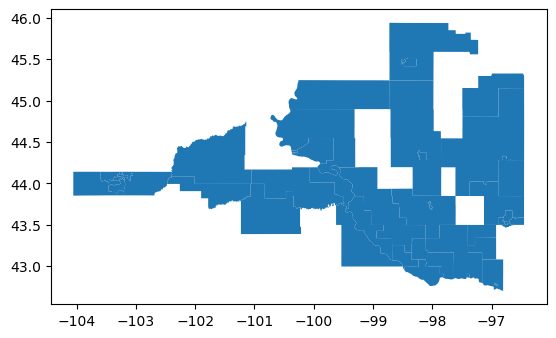

In [14]:
# plot shape info to map
gdfin1.plot()

In [15]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)


print(len(goutdf1))
goutdf1.head()

49


,in_ReportingUnitNativeID,geometry
0,SD1,"POLYGON ((-96.45221 45.15084, -96.45237 45.136..."
1,SD2,"POLYGON ((-96.45254 44.2837, -96.45249 44.2797..."
2,SD3,"MULTIPOLYGON (((-97.33249 44.02249, -97.3274 4..."
3,SD4,"MULTIPOLYGON (((-96.70082 43.52283, -96.69849 ..."
4,SD5,"POLYGON ((-96.6943 43.54757, -96.69394 43.5430..."


#### Overlay Area #2 shapefile info

In [16]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [17]:
# Concatenate Geometry DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

49


,in_ReportingUnitNativeID,geometry
0,SD1,"POLYGON ((-96.45221 45.15084, -96.45237 45.136..."
1,SD2,"POLYGON ((-96.45254 44.2837, -96.45249 44.2797..."
2,SD3,"MULTIPOLYGON (((-97.33249 44.02249, -97.3274 4..."
3,SD4,"MULTIPOLYGON (((-96.70082 43.52283, -96.69849 ..."
4,SD5,"POLYGON ((-96.6943 43.54757, -96.69394 43.5430..."


## Export Data

In [18]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   WaDEUUID                        49 non-null     object        
 1   in_Date                         49 non-null     object        
 2   in_Year                         49 non-null     object        
 3   in_OrganizationUUID             49 non-null     object        
 4   in_EPSGCodeCV                   49 non-null     object        
 5   in_ReportingUnitName            49 non-null     object        
 6   in_ReportingUnitNativeID        49 non-null     object        
 7   in_ReportingUnitProductVersion  49 non-null     object        
 8   in_ReportingUnitTypeCV          49 non-null     object        
 9   in_ReportingUnitUpdateDate      49 non-null     object        
 10  in_StateCV                      49 non-null     object        
 11  in_Overs

In [19]:
outdf

,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_OversightAgency,in_OverlayDescription,in_OverlayName,in_OverlayNativeID,in_OverlayStatusCV,in_Statute,in_StatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_OverlayTypeCV,in_WaterSourceTypeCV
0,ov0,8/7/2023,2023,SDov_O1,4326,East Dakota,SD1,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,1,Active,,,2011-01-01,,Water Development District,Surface Water
1,ov1,8/7/2023,2023,SDov_O1,4326,East Dakota,SD2,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,2,Active,,,2011-01-01,,Water Development District,Surface Water
2,ov2,8/7/2023,2023,SDov_O1,4326,East Dakota,SD3,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,3,Active,,,2011-01-01,,Water Development District,Surface Water
3,ov3,8/7/2023,2023,SDov_O1,4326,East Dakota,SD4,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,4,Active,,,2011-01-01,,Water Development District,Surface Water
4,ov4,8/7/2023,2023,SDov_O1,4326,East Dakota,SD5,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,5,Active,,,2011-01-01,,Water Development District,Surface Water
5,ov5,8/7/2023,2023,SDov_O1,4326,East Dakota,SD6,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,6,Active,,,2011-01-01,,Water Development District,Surface Water
6,ov6,8/7/2023,2023,SDov_O1,4326,East Dakota,SD7,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,7,Active,,,2011-01-01,,Water Development District,Surface Water
7,ov7,8/7/2023,2023,SDov_O1,4326,East Dakota,SD8,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,8,Active,,,2011-01-01,,Water Development District,Surface Water
8,ov8,8/7/2023,2023,SDov_O1,4326,East Dakota,SD9,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",East Dakota,9,Active,,,2011-01-01,,Water Development District,Surface Water
9,ov9,8/7/2023,2023,SDov_O1,4326,James River,SD10,,Water Development District,3/21/2021,SD,South Dakota Association of Rural Water Systems,"work to promote the conservation, development ...",James River,10,Active,,,2011-01-01,,Water Development District,Surface Water


In [20]:
goutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   in_ReportingUnitNativeID  49 non-null     object  
 1   geometry                  49 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 916.0+ bytes


In [21]:
goutdf

,in_ReportingUnitNativeID,geometry
0,SD1,"POLYGON ((-96.45221 45.15084, -96.45237 45.136..."
1,SD2,"POLYGON ((-96.45254 44.2837, -96.45249 44.2797..."
2,SD3,"MULTIPOLYGON (((-97.33249 44.02249, -97.3274 4..."
3,SD4,"MULTIPOLYGON (((-96.70082 43.52283, -96.69849 ..."
4,SD5,"POLYGON ((-96.6943 43.54757, -96.69394 43.5430..."
5,SD6,"POLYGON ((-96.78006 43.54274, -96.78052 43.536..."
6,SD7,"POLYGON ((-96.70095 43.67427, -96.69757 43.674..."
7,SD8,"POLYGON ((-96.45343 43.58746, -96.4534 43.5825..."
8,SD9,"POLYGON ((-96.48144 45.32655, -96.46963 45.325..."
9,SD10,"MULTIPOLYGON (((-98.33606 45.93622, -98.33204 ..."


In [22]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.